In [1]:
from IPython.display import clear_output
!pip install tf_explain
clear_output()

In [2]:
import os
import keras
import numpy as np
import pandas as pd
from glob import glob
import tensorflow as tf
import tensorflow.image as tfi

In [3]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Layer
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers import Add
from keras.layers import Multiply
from keras.layers import Input
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

# Procure and Analyze of Data

Number of training images: 780
Number of labels: 780
No. of classes:  3
Various Classes:  ['benign', 'normal', 'malignant']
Random image size:  (554, 469)


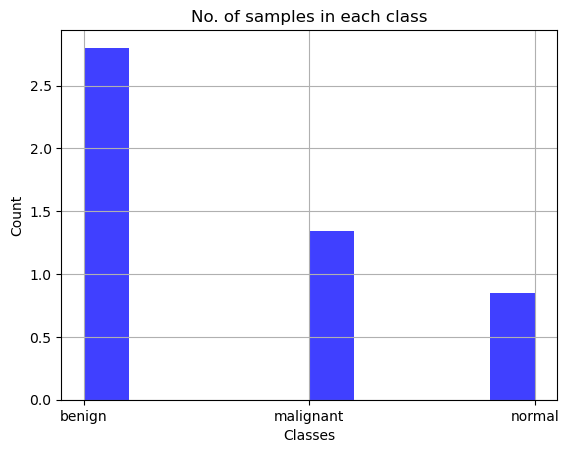

In [105]:
from PIL import Image
from pathlib import Path

root_dir = "C:/Users/zhang/MSCA/Machine learning/Dataset_BUSI_with_GT/"
path = Path(root_dir)
path_images = list(path.glob('**/*.png'))

# Get the image paths excluding the ones with '_mask' in their names
images_paths = [str(path_image) for path_image in path_images if '_mask' not in str(path_image)]
print(f'Number of training images: {len(images_paths)}')

# Get the labels by extracting the parent directory names of the image paths
labels = [os.path.split(os.path.split(name)[0])[1] for name in images_paths]
print(f'Number of labels: {len(labels)}')

# Determine the unique classes and create a dictionary mapping classes to numerical labels
classes = list(set(labels))
labels_dict = {label: i for i, label in enumerate(classes)}
labels_val = [labels_dict[label_key] for label_key in labels]

print("No. of classes: ", len(classes))
print("Various Classes: ", classes)

# Open a random image to get its size
img = Image.open(images_paths[18])
print("Random image size: ", img.size)

# Plot a histogram of the sample count per class
no_of_samples = pd.DataFrame(labels, columns=["class"])
plt.hist(no_of_samples, density=True, facecolor='b', alpha=0.75)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('No. of samples in each class')
plt.grid(True)
plt.show()


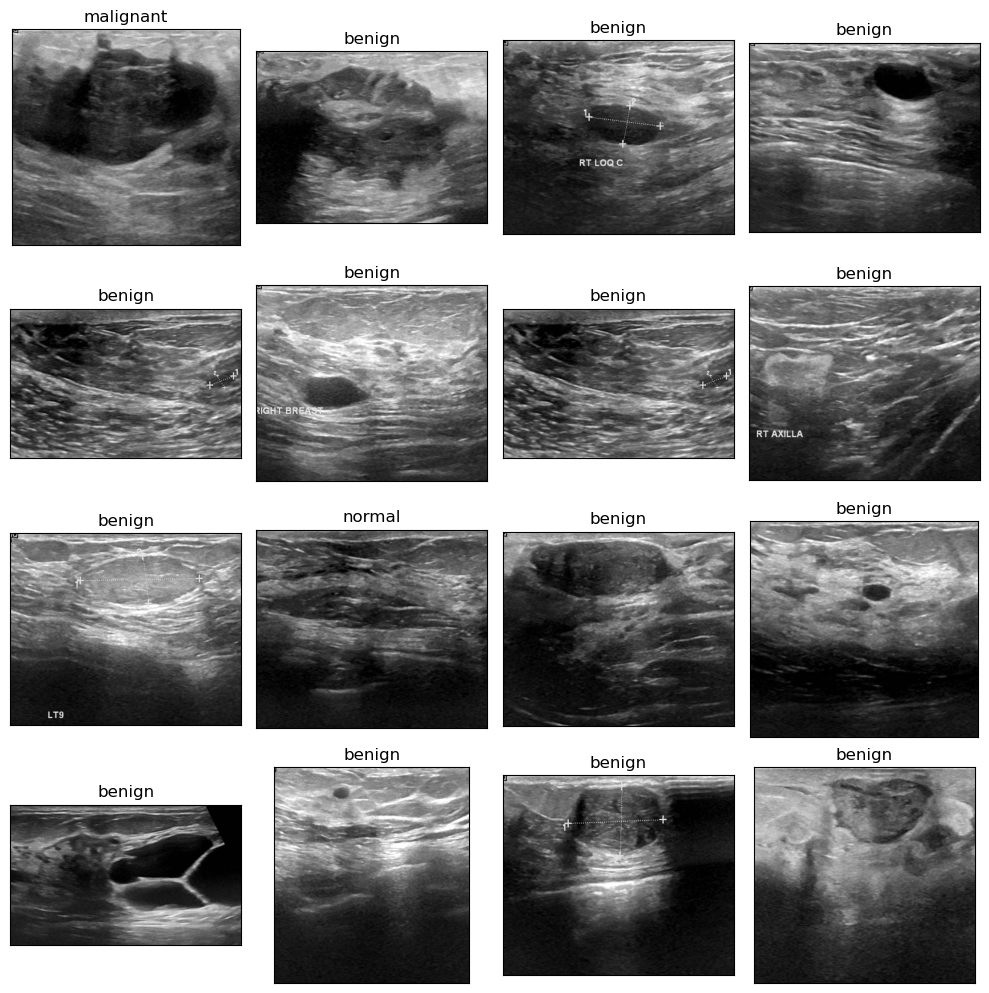

In [106]:
import matplotlib.pyplot as plt

# Randomly sample 16 indices from the dataset
random_indices = np.random.randint(0, len(images_paths), 16)

# Create a figure with a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Iterate through the subplots and display the sampled images
for i, ax in enumerate(axes.flat):
    # Get the image path and label corresponding to the current random index
    image_path = images_paths[random_indices[i]]
    label = labels[random_indices[i]]
    
    # Read and display the image on the current subplot
    image = plt.imread(image_path)
    ax.imshow(image)
    
    # Set the title as the image label
    ax.set_title(label)
    
    # Remove the tick marks on the x-axis and y-axis
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



# Data

In [129]:
batch_size = 30
img_height = 210
img_width = 210

In [130]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  root_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(root_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)


Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [131]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

In [132]:
model.compile(
    optimizer="Adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


In [111]:
epochs = 11

history = model.fit(
    train_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=val_data
)


Epoch 1/11


C:\Users\zhang\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


43/43 [==============================] - 9s 197ms/step - loss: 1.0810 - accuracy: 0.5519 - val_loss: 0.8055 - val_accuracy: 0.5968
Epoch 2/11
43/43 [==============================] - 9s 196ms/step - loss: 0.6827 - accuracy: 0.6952 - val_loss: 0.6849 - val_accuracy: 0.7429
Epoch 3/11
43/43 [==============================] - 9s 198ms/step - loss: 0.5463 - accuracy: 0.7688 - val_loss: 0.6618 - val_accuracy: 0.7429
Epoch 4/11
43/43 [==============================] - 9s 197ms/step - loss: 0.4160 - accuracy: 0.8282 - val_loss: 0.7013 - val_accuracy: 0.7683
Epoch 5/11
43/43 [==============================] - 9s 199ms/step - loss: 0.3530 - accuracy: 0.8630 - val_loss: 0.9037 - val_accuracy: 0.7111
Epoch 6/11
43/43 [==============================] - 9s 202ms/step - loss: 0.2509 - accuracy: 0.9121 - val_loss: 0.7621 - val_accuracy: 0.7365
Epoch 7/11
43/43 [==============================] - 9s 201ms/step - loss: 0.1705 - accuracy: 0.9279 - val_loss: 1.0462 - val_accuracy: 0.7492
Epoch 8/11
43/43 

In [112]:
# Evaluate the model on the test dataset
eva_model1 = model.evaluate(val_data)


11/11 [==============================] - 1s 38ms/step - loss: 1.2706 - accuracy: 0.7841


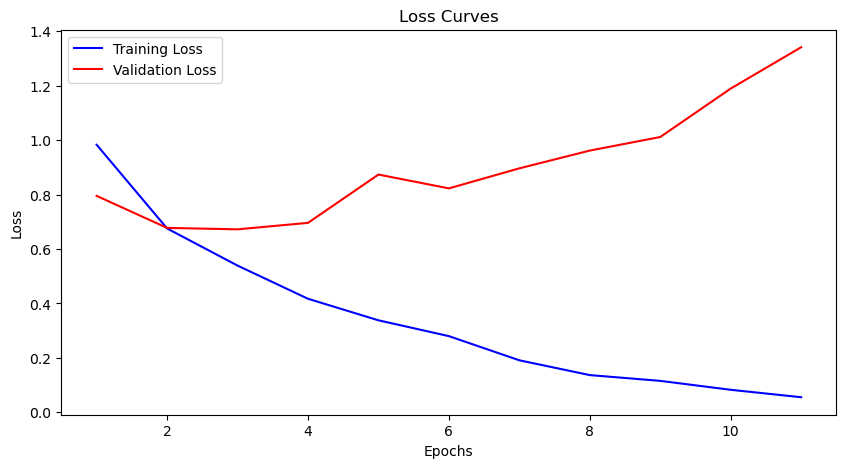

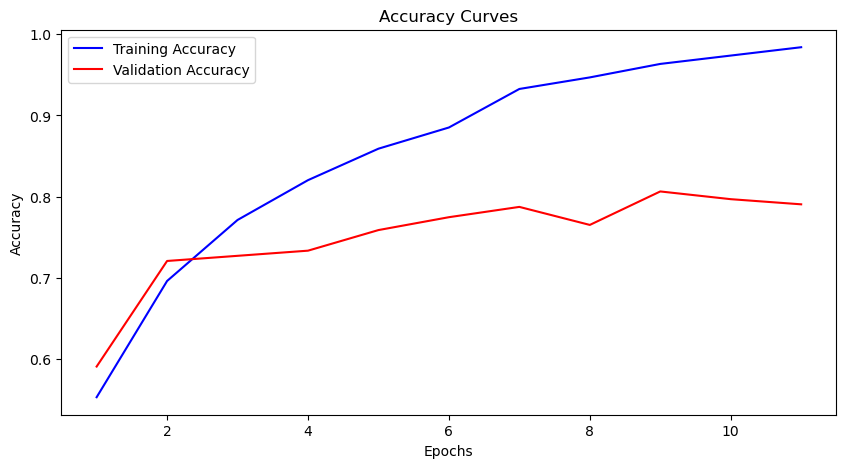

In [12]:

# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 210, 210, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 210, 210, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 105, 105, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1

# Model 2: U_Net

In [115]:
# Resize input images to (128, 128)
resized_train_data = train_data.map(lambda x, y: (tf.image.resize(x, (128, 128)), y))
resized_val_data = val_data.map(lambda x, y: (tf.image.resize(x, (128, 128)), y))

In [116]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model
import tensorflow.keras.utils as keras_utils

inply = Input((128, 128, 3,))

conv1 = Conv2D(2**6, (3,3), activation='relu', padding='same')(inply)
conv1 = Conv2D(2**6, (3,3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2,2), strides=2, padding='same')(conv1)
drop1 = Dropout(0.2)(pool1)

conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(drop1)
conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
drop2 = Dropout(0.2)(pool2)

conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(drop2)
conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
drop3 = Dropout(0.2)(pool3)

conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(drop3)
conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
drop4 = Dropout(0.2)(pool4)

convm = Conv2D(1024, (3, 3), activation='relu', padding='same')(drop4)
convm = Conv2D(1024, (3, 3), activation='relu', padding='same')(convm)
tran5 = Conv2DTranspose(512, (2, 2), strides=2, padding='valid', activation='relu')(convm)
conc5 = Concatenate()([tran5, conv4])
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conc5)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
drop5 = Dropout(0.1)(conv5)

tran6 = Conv2DTranspose(256, (2, 2), strides=2, padding='valid', activation='relu')(drop5)
conc6 = Concatenate()([tran6, conv3])
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conc6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
drop6 = Dropout(0.1)(conv6)

tran7 = Conv2DTranspose(128, (2, 2), strides=2, padding='valid', activation='relu')(drop6)
conc7 = Concatenate()([tran7, conv2])
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conc7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
drop7 = Dropout(0.1)(conv7)

tran8 = Conv2DTranspose(64, (2, 2), strides=2, padding='valid', activation='relu')(drop7)
conc8 = Concatenate()([tran8, conv1])
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conc8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
drop8 = Dropout(0.1)(conv8)
outly = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(drop8)


In [117]:
model = Model(inputs=inply, outputs=outly, name='U-net')

In [118]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.00005),metrics=['acc'])
print(model.summary())

Model: "U-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_323 (Conv2D)            (None, 128, 128, 64  1792        ['input_29[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_324 (Conv2D)            (None, 128, 128, 64  36928       ['conv2d_323[0][0]']             
                                )                                                             

                                                                                                  
 conv2d_transpose_31 (Conv2DTra  (None, 128, 128, 64  32832      ['dropout_69[0][0]']             
 nspose)                        )                                                                 
                                                                                                  
 concatenate_59 (Concatenate)   (None, 128, 128, 12  0           ['conv2d_transpose_31[0][0]',    
                                8)                                'conv2d_324[0][0]']             
                                                                                                  
 conv2d_339 (Conv2D)            (None, 128, 128, 64  73792       ['concatenate_59[0][0]']         
                                )                                                                 
                                                                                                  
 conv2d_34

In [95]:
# Train the model 
history = model.fit(resized_train_data, epochs=3, batch_size=30, validation_data=resized_val_data)


Epoch 1/3
43/43 [==============================] - 215s 5s/step - loss: 0.5848 - acc: 0.3014 - val_loss: 0.5952 - val_acc: 0.2616
Epoch 2/3
43/43 [==============================] - 212s 5s/step - loss: 0.5831 - acc: 0.2961 - val_loss: 0.5938 - val_acc: 0.2643
Epoch 3/3
43/43 [==============================] - 204s 5s/step - loss: 0.5826 - acc: 0.3020 - val_loss: 0.5926 - val_acc: 0.2624


In [119]:
# Evaluate the model on the test dataset
eva_model2 = model.evaluate(resized_val_data)

11/11 [==============================] - 10s 898ms/step - loss: 0.7770 - acc: 0.5503


In [136]:
def saliency(model, test_ds, index):
    """
    Draws a saliency map for a given index image to explain the model's decision making process.
    """
    for param in model.parameters():
        param.requires_grad = False
    
    model.eval()
    image, label = test_ds[index]
    img = image.unsqueeze(0)
    img = img.cuda()
    img.requires_grad = True
    
    preds = model(img)
    score, indices = torch.max(preds, 1)
    score.backward()
    
    s, _ = torch.max(torch.abs(img.grad[0]), dim=0)
    s = (s-s.min())/(s.max()-s.min())

    #plot image and its saliency map
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
    print("Class: ", classes[label])
    print("Prediction: ", classes[indices])
    ax[0].set_title('Original')
    ax[0].axis('off')
    ax[1].imshow(s.cpu().numpy(), cmap='plasma') #set any of the cmap from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ax[1].set_title('Saliency Map')
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 24ms/step


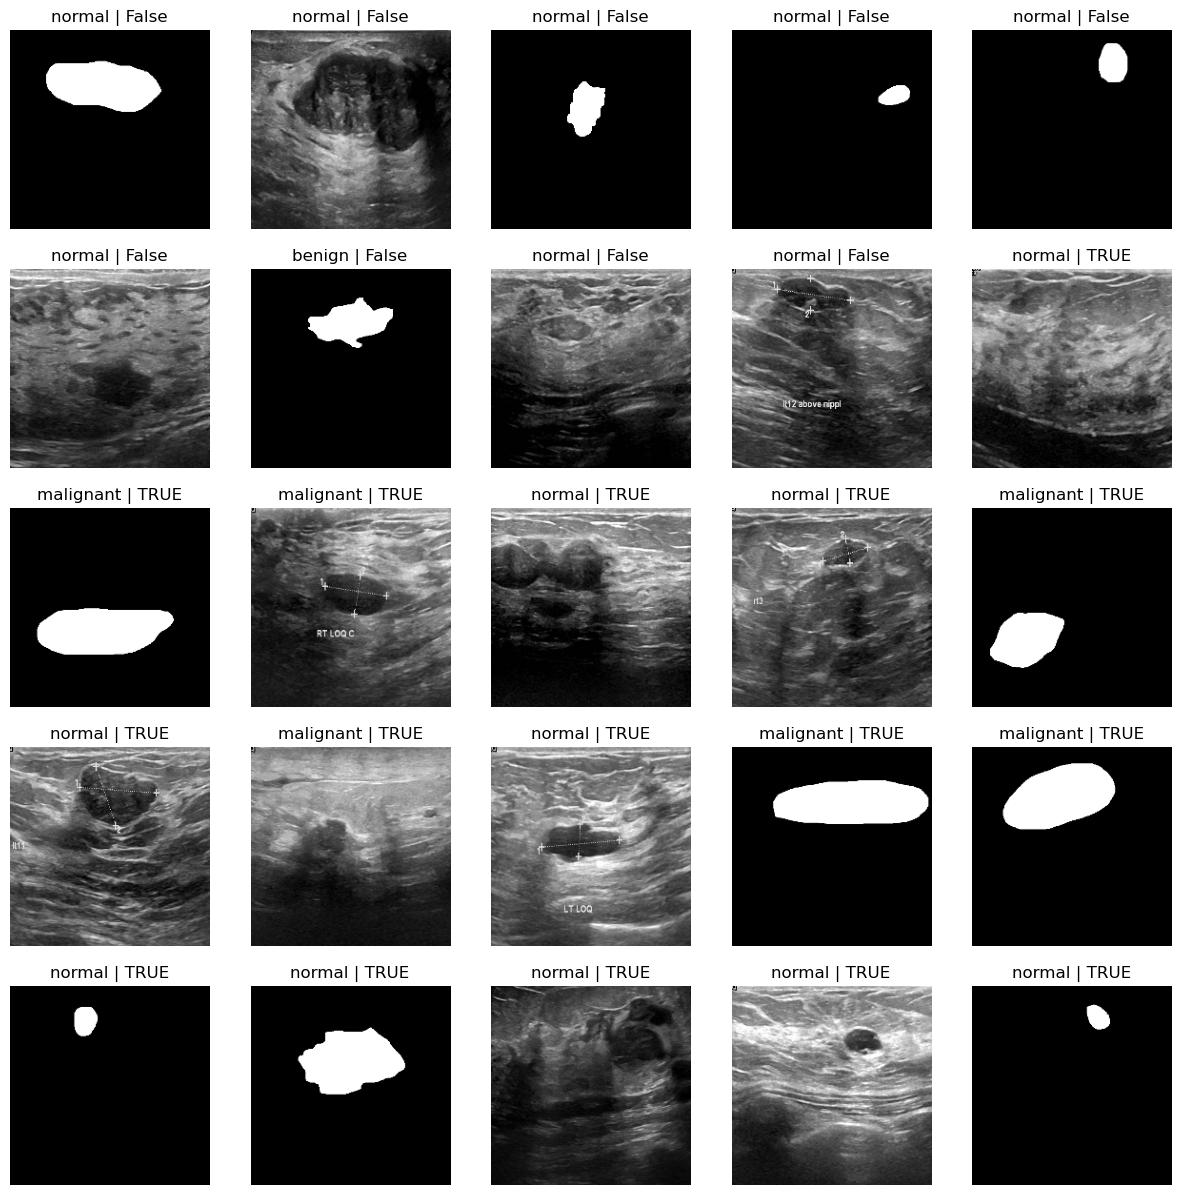

In [135]:
# Use CNN to Preict
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")